In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt

In [2]:
def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff


Для 3 точек(p = 2 теоретически)

In [3]:
a = 0
b = 0.2
k = 3

h = (b-a)/(k-1)

x = np.linspace(a, b, k)

u = np.exp(x)

diff = get_diff(u, 0, k-1, h)

eps_h = np.abs(np.exp(0) - diff) #ошибка для h



In [4]:
h = (b/2-a)/(k-1)

x = np.linspace(a, b/2, k)

u = np.exp(x)

diff = get_diff(u, 0, k-1, h)

eps_h2 = np.abs(np.exp(0) - diff) #ошибка для h/2


In [5]:
p = np.log2(eps_h/eps_h2)
print(p)

2.0548488541544963


Теперь для 5 точек(p = 4 теоретически)

In [6]:
a = 0
b = 0.2
k = 5

h = (b-a)/(k-1)

x = np.linspace(a, b, k)

u = np.exp(x)

diff = get_diff(u, 0, k-1, h)

eps_h = np.abs(np.exp(0) - diff) #ошибка для h


In [7]:
h = (b/2-a)/(k-1)

x = np.linspace(a, b/2, k)

u = np.exp(x)

diff = get_diff(u, 0, k-1, h)

eps_h2 = np.abs(np.exp(0) - diff) #ошибка для h/2


In [8]:
p = np.log2(eps_h/eps_h2)
print(p)

4.0605421732203935


Исследуем зависимость p(h)

[0.01, 0.004641588833612777, 0.0021544346900318843, 0.001, 0.0004641588833612782, 0.00021544346900318823, 0.0001, 4.641588833612772e-05, 2.1544346900318867e-05, 1e-05]
[2.00541754480838, 2.002512699024566, 2.0011658515630146, 2.000534041368568, 2.000204895333213, 2.001009547094155, 2.0008183409379905, 2.079061811145294, 1.4463688281744864, 2.9018221888022935]


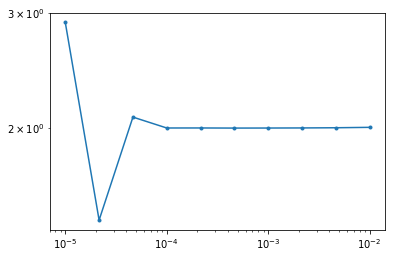

In [10]:
h_array = list()
p_array = list()

for i in range(10):
    h_array.append(10**(-i/3-2))
    
print(h_array)

for h in h_array:  
    a = 0
    k = 3
    b = a + (k-1)*h
    x = np.linspace(a, b, k)
    u = np.exp(x)
    diff = get_diff(u, 0, k-1, h)
    eps_h = np.abs(np.exp(0) - diff) #ошибка для h
    x = np.linspace(a, b/2, k)
    u = np.exp(x)
    diff = get_diff(u, 0, k-1, h/2)
    eps_h2 = np.abs(np.exp(0) - diff) #ошибка для h/2
    p_array.append(np.log2(eps_h/eps_h2))

print(p_array)
fig = plt.figure()
ax = fig.gca()
ax.plot(h_array, p_array,'.-')
ax.set_yscale('log')
ax.set_xscale('log')


При большом шаге идет отклонение от теоретического p (равного 4), так как коэфф C в формуле $\epsilon_h = Ch^p$ уже нельзя считать постоянным, а при маленьком шаге ошибка округления связанная с машинным нулем вносит свой вклад.